# Solving the 1-D Advection equation using FOU scheme 

$$( \frac{\partial u}{\partial t} + v \frac{\partial u}{\partial x} )= 0$$

In [20]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

In [21]:
# defining variables 
xmin = 0        # minimum value of x 
xmax = 1        # maximum value of x
N = 200         # Number of nodes  
dt = 0.001      # time step
tmax = 1        # solution time
v = 1           # velocity
t0 = 0

In [22]:
# Discritize the domain 
dx = (xmax - xmin)/N
x = np.arange(xmin-dx,xmax+dx,dx)
# set initial condition 
u0 = np.exp(-200*np.square(x-0.25))

In [23]:
u = u0.copy()
unp1 = u0.copy()
unpf = []
uexact = []
t = np.arange(t0, tmax, dt)
#Newman boundary condition no gradient across the boundary 
u[0]= u[2]
u[-1]= u[N-1]
#Loop through time
nsteps = int(tmax/dt)
for n in range (0,nsteps):    
    #Calculate the FOU scheme
    for i in range (1, N+1):
        unp1[i] = u[i] - v*(dt/dx)*(u[i]-u[i-1])
    unpf.append(unp1.copy())
    uexact.append(np.exp(-200*np.square(x-0.25-v*dt*n)))
    u = unp1


<IPython.core.display.Javascript object>


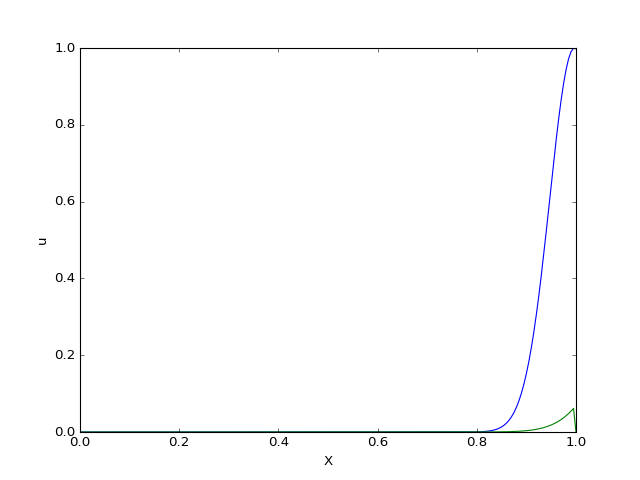

In [24]:
fig, ax = plt.subplots()
# line, = ax.plot(x, u0)
# plt.xlabel('x')
# plt.ylabel('u')
# plt.title('Initial condition')
ax.set_xlim(xmin, xmax)
ax.set_xlabel('X')
ax.set_ylabel('u')
line, = ax.plot(x, u0)
line2, = ax.plot(x, u0)
def animate(i):
    line.set_ydata(uexact[i])  # update the data
    line2.set_ydata(unpf[i])  # update the data
    return line, line2,

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(uexact)), interval=100)
plt.show()
